# Multiclass classification - Part 1 

# What this notebook includes
1. Creating dataset 
2. Data Preprocessing
3. Using Different ML and DL Models (no ensembly here)


In [ ]:
# dataset link
# https://www.machinehack.com/wp-content/uploads/2020/03/MovieScriptsParticipantsData-1.zip

# Imports  
## may 07

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gc
import pickle  as pk
import os
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Tools for preprocessing input data
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
# Tools for creating ngrams and vectorizing input data
# import gensim

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser



# Tools for building a model
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer



from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional,Flatten,GlobalMaxPooling1D,MaxPool1D
from keras.layers.embeddings import Embedding

from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences

# Tools for assessing the quality of model prediction
from sklearn.metrics import accuracy_score, confusion_matrix,log_loss,f1_score


import tensorflow_hub as hub




Using TensorFlow backend.


In [27]:
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Creating dataset data 

In [5]:
data_folder = r'Scripts'
all_files = os.listdir(data_folder)
print('Total Number of Files :', len(all_files))
train_df = pd.read_csv('Train.csv')
# train_df.head()

test_df = pd.read_csv('Test.csv')
# test_df.head()

Total Number of Files : 2827


In [105]:
train_df['Labels'].value_counts()

6     405
19    261
4     243
0     203
5     141
15    134
1     116
16    109
11    104
8      79
14     75
7      27
2      25
20     18
13     15
21      9
12      4
9       3
3       2
17      2
10      2
18      1
Name: Labels, dtype: int64

In [7]:

# train_df['Script'] = [open(data_folder + os.sep + file, "r").read() for file in train_df['File_Name']]
# test_df['Script'] = [open(data_folder + os.sep + file, "r").read() for file in test_df['File_Name']]
# pk.dump(train_df,open('train_x','wb'))
# pk.dump(test_df,open('test_x','wb'))


In [3]:
train_data = pk.load(open('train_x','rb'))
test_data = pk.load(open('test_x','rb'))

# Preprocessig Part

In [21]:

#helper functions for lemmatizations
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
              'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(text,wnl): 
    
    # Text input is string, returns lowercased strings.
    ls = list(wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(word_tokenize(text)))

    str = ''

    for i in  ls:
          str += i.lower() + ' '

    return str  


def clean_text(x):
    
    
    global words,wnl
    
    # remove html tags
    regex = re.compile('<.*?>')
    input =  re.sub(regex, '', x)

    #remove punctuations, numbers.
    input = re.sub('[!@#$%^&*()\n_:><?\-.{}|+-,;""``~`—]|[0-9]|/|=|\[\]|\[\[\]\]',' ',input)
    input = re.sub('[“’\']','',input)   
        
    #remove stopwords

    tmp_str  = ''
    for i in word_tokenize(input):

       if i  not in words and len(set(i)) > 2:
            tmp_str += i + ' '

    
    #lemmatize the text.
    

    return lemmatize_sent(tmp_str,wnl)



wnl = WordNetLemmatizer()
words = stopwords.words('english')

tmp_sent  = "AAAAAA <html> <h1> run <i>running</i> ban banned dancing dance 1 2 3  4   5 5  5 !@#$%^&*(){{:><<< MMM<>?PLOKIU}} </h1> </html>"


clean_text(tmp_sent)



'run run ban ban dance dance plokiu '

In [22]:
# # starting preprocessing 

# train_data['processed_script'] = train_data['Script'].map(clean_text)

# test_data['processed_script'] = test_data['Script'].map(clean_text)



In [24]:
# pk.dump(train_data,open('processed_train_data','wb'))
# pk.dump(test_data,open('processed_test_data','wb'))

# Start from this Cell


In [2]:
train_data = pk.load(open('post_processed_train','rb'))
test_data = pk.load(open('post_processed_test','rb'))


# Class wise sample lengths

mean for class 0 is 2478.541871921182 max length = 3970
no. of samples 203


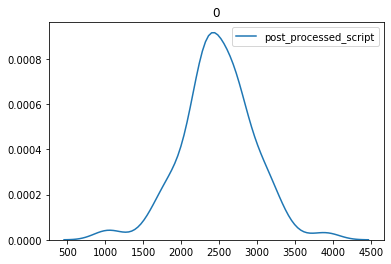

mean for class 1 is 2344.4137931034484 max length = 3301
no. of samples 116


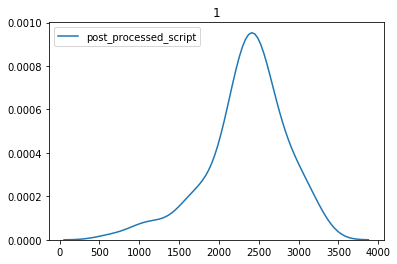

mean for class 2 is 1973.92 max length = 3187
no. of samples 25


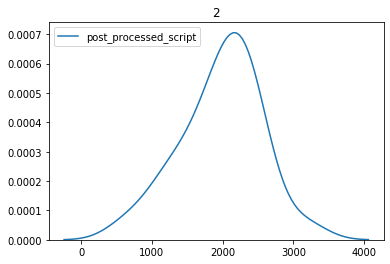

mean for class 3 is 3108.0 max length = 3739
no. of samples 2


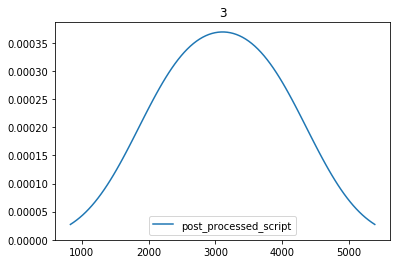

mean for class 4 is 2179.3909465020574 max length = 3431
no. of samples 243


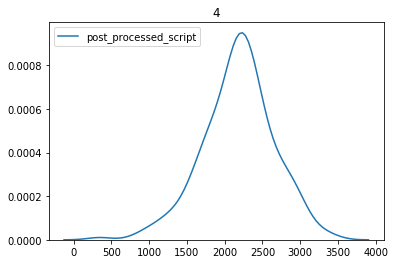

mean for class 5 is 2361.432624113475 max length = 4208
no. of samples 141


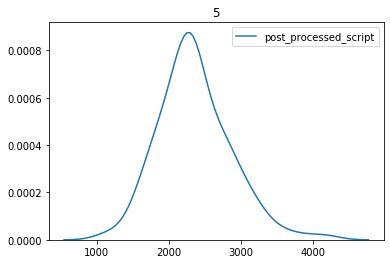

mean for class 6 is 2309.595061728395 max length = 4208
no. of samples 405


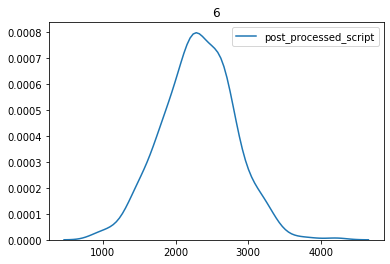

mean for class 7 is 1780.5185185185185 max length = 2901
no. of samples 27


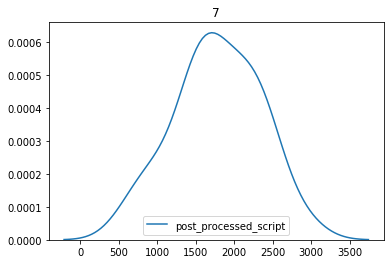

mean for class 8 is 2242.8987341772154 max length = 3914
no. of samples 79


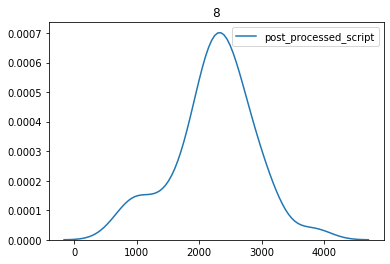

mean for class 9 is 2190.0 max length = 2253
no. of samples 3


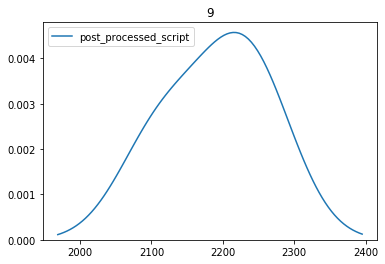

mean for class 10 is 2052.5 max length = 2295
no. of samples 2


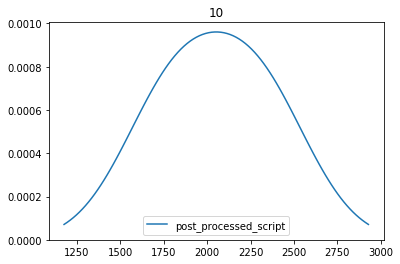

mean for class 11 is 2248.8846153846152 max length = 3347
no. of samples 104


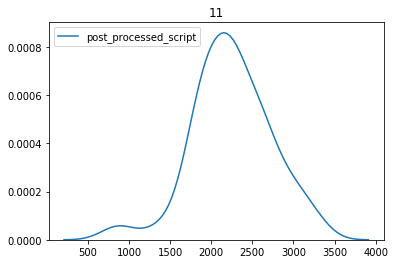

mean for class 12 is 2485.75 max length = 3739
no. of samples 4


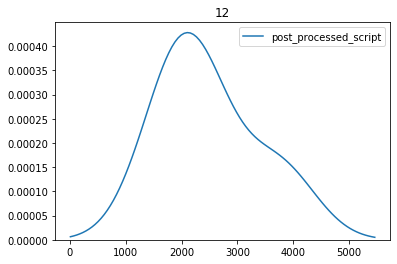

mean for class 13 is 1905.7333333333333 max length = 3008
no. of samples 15


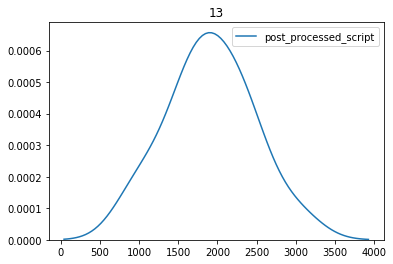

mean for class 14 is 2393.6133333333332 max length = 4208
no. of samples 75


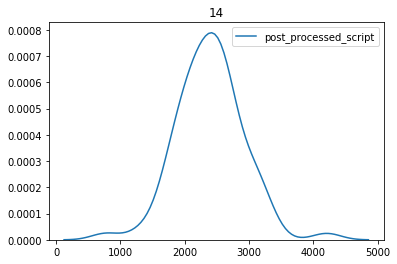

mean for class 15 is 2201.2388059701493 max length = 3617
no. of samples 134


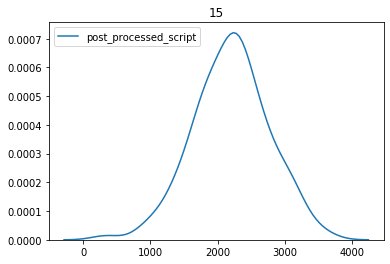

mean for class 16 is 2462.577981651376 max length = 3970
no. of samples 109


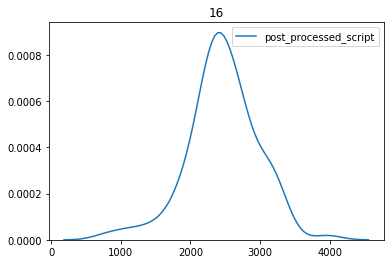

mean for class 17 is 1154.0 max length = 1163
no. of samples 2


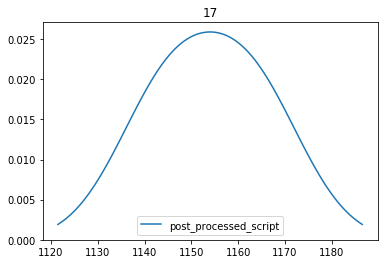

mean for class 19 is 2359.8122605363983 max length = 4208
no. of samples 261


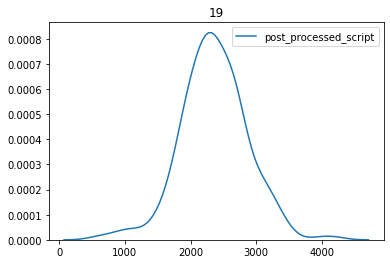

mean for class 20 is 2489.9444444444443 max length = 3124
no. of samples 18


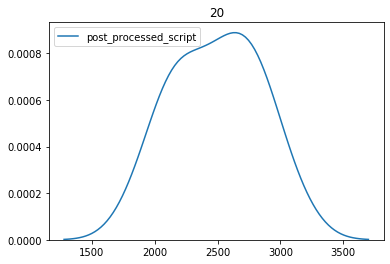

mean for class 21 is 2611.222222222222 max length = 3165
no. of samples 9


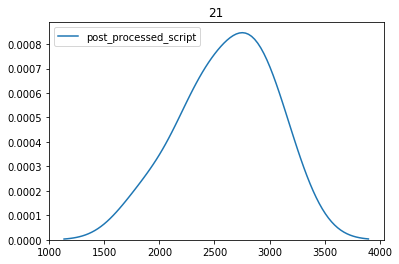

In [4]:


for i in range(0,22):
    
    if i == 18:
        continue 
        
    data  = train_data[train_data.Labels == i]

    sample_lengths = data['post_processed_script'].map(lambda x : len(x.split()))

    print('mean for class {} is {} max length = {}'.format(i,np.mean(sample_lengths),max(sample_lengths)))
    print('no. of samples {}'.format(len(sample_lengths)))
    plt.figure()    
    sb.kdeplot(sample_lengths)
    plt.title(i)    
    plt.show()


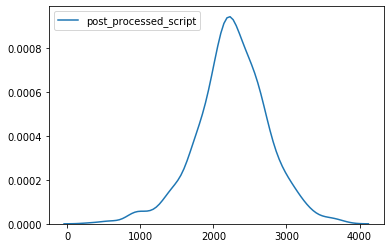

In [5]:
sample_test_length = test_data['post_processed_script'].map(lambda x : len(x.split()))

sb.kdeplot(sample_test_length)

In [15]:
for i in sample_test_length:
    
    if i > 3700:
        print(i)

3743
3725


In [31]:


# tokenizer = text.Tokenizer()
# tokenizer.fit_on_texts(train_data['post_processed_script'])
# # sequences = tokenizer.texts_to_sequences(train_data['post_processed_scrip

matrix = tokenizer.texts_to_matrix(train_data['post_processed_script'],mode = 'tfidf')

In [39]:
np.unique(matrix).shape

(1602,)

In [19]:
# deciding parameters

vocab_size = len(tokenizer.word_counts) + 1
output_dims = 8
input_length = 3700

In [21]:
from sklearn.preprocessing import LabelBinarizer


br = LabelBinarizer()

br.fit(train_data['Labels'].values.reshape(-1,1))

Y = br.transform(train_data['Labels'].values.reshape(-1,1))

Y.shape

(1979, 22)

In [58]:
X = pad_sequences(sequences,maxlen=input_length)
X.shape

(1979, 3700)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    matrix,
    Y,
    
    test_size=0.2,
    shuffle = True,
    random_state=3)

In [56]:
X_train.shape

(1583, 28034)

# Model 

In [24]:
'''
version 1
loss of : 3.4 on the leaderboard
with following parameters : input_dim=10000,output_dim=8,input_length=15000)

version 2
added new Dense(32) layer  


'''

'\n\nloss of : 3.4 on the leaderboard\nwith following parameters : input_dim=10000,output_dim=8,input_length=15000)\n\n\n'

In [93]:
model = Sequential()
model.add(Dense(256,input_dim = (vocab_size),activation = 'sigmoid'))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(64,activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(32,activation = 'sigmoid'))
model.add(Dense(22, activation='softmax'))

model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               7176960   
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 22)              

In [72]:
from keras.callbacks import ReduceLROnPlateau


rlop = ReduceLROnPlateau(monitor = 'val_acc',patience = 1,factor = 0.2,verbose = 1,min_lr = 0)


In [81]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=30)


Train on 1583 samples, validate on 396 samples
Epoch 1/30
1583/1583 [==============================] - 2s 1ms/step - loss: 3.1107 - accuracy: 0.0948 - val_loss: 2.9039 - val_accuracy: 0.1313
Epoch 2/30
1583/1583 [==============================] - 2s 965us/step - loss: 2.8251 - accuracy: 0.1491 - val_loss: 2.7322 - val_accuracy: 0.1970
Epoch 3/30
1583/1583 [==============================] - 1s 932us/step - loss: 2.7211 - accuracy: 0.1914 - val_loss: 2.6358 - val_accuracy: 0.1970
Epoch 4/30
1583/1583 [==============================] - 1s 929us/step - loss: 2.6380 - accuracy: 0.1838 - val_loss: 2.5749 - val_accuracy: 0.1970
Epoch 5/30
1583/1583 [==============================] - 1s 910us/step - loss: 2.5729 - accuracy: 0.1952 - val_loss: 2.5270 - val_accuracy: 0.1970
Epoch 6/30
1583/1583 [==============================] - 2s 951us/step - loss: 2.4942 - accuracy: 0.2217 - val_loss: 2.4883 - val_accuracy: 0.1970
Epoch 7/30
1583/1583 [==============================] - 2s 950us/step - loss: 2

In [39]:
# history.history

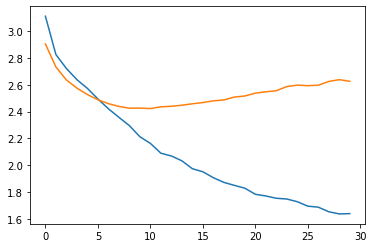

In [82]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')

In [83]:
#convert loss back to numbers




print('logloss on train data is:',log_loss(y_train,model.predict(X_train)))

# log_loss([1,1,1],[1,1,1])


print('logloss on test data is:',log_loss(y_test,model.predict(X_test)))




logloss on train data is: 1.4846070126047333
logloss on test data is: 2.6256782092680835


In [95]:
from sklearn.model_selection import StratifiedKFold


sk = StratifiedKFold(n_splits = 5)



for train_index,test_index in sk.split(matrix,train_data['Labels']):
    
    train_x,train_y = matrix[train_index],Y[train_index]
    test_x,test_y = matrix[train_index],Y[train_index]
    
    
    
    
    history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=10)



    print('logloss on train data is:',log_loss(y_train,model.predict(X_train)))

    # log_loss([1,1,1],[1,1,1])


    print('logloss on test data is:',log_loss(y_test,model.predict(X_test)))




Train on 1583 samples, validate on 396 samples
Epoch 1/10
1583/1583 [==============================] - 2s 2ms/step - loss: 0.1412 - accuracy: 0.9545 - val_loss: 0.1567 - val_accuracy: 0.9545
Epoch 2/10
1583/1583 [==============================] - 2s 2ms/step - loss: 0.1393 - accuracy: 0.9545 - val_loss: 0.1562 - val_accuracy: 0.9545
Epoch 3/10
1583/1583 [==============================] - 2s 2ms/step - loss: 0.1377 - accuracy: 0.9545 - val_loss: 0.1563 - val_accuracy: 0.9545
Epoch 4/10
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1357 - accuracy: 0.9545 - val_loss: 0.1572 - val_accuracy: 0.9545
Epoch 5/10
1583/1583 [==============================] - 2s 2ms/step - loss: 0.1336 - accuracy: 0.9546 - val_loss: 0.1571 - val_accuracy: 0.9545
Epoch 6/10
1583/1583 [==============================] - 2s 1ms/step - loss: 0.1313 - accuracy: 0.9547 - val_loss: 0.1579 - val_accuracy: 0.9545
Epoch 7/10
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1301 - accu

In [92]:
labels = br.inverse_transform(y_test)
pred_labels = np.argmax(model.predict(X_test),axis = 1)
print(labels)
print(pred_labels)
# f1_score(y_test,model.predict(X_test),average = "micro")
accuracy_score(labels,pred_labels)

[16  5 19 19  1 14  7  0  5 15 19 15  5  5  4  5  4  4 15 19 16  5  6  6
  0  6  4  6  6  4  6  6  0  4 11  6  6  6 19 16 15 11  6 15 14  0  0  6
 19  4  6 16  6 15 19  8  0  4  6  4  0 19 20 15  8 19 19  0  0  0  0  6
 19 16  5 15 14  6 16 19  6 19  0 16 11  4  4  0 19 21 15  6  8 16 19  5
  1 19 19  2  5  6  1 16  6  6  0 15  6  0  6  6 11  8 19 15  4  0  6  1
  4 19  6  0 19 16  1  4  6 11  4  4 19 15  0  8  4  6  6  8 16  1 15  8
  1 19 14  7  4 15 11  6 11 19  1 16  4  4 14  6  6  0  0 19  4 11  5  6
 19 11  6  2 19  8  6  6  6 13  0  4 19  5  5  2 20  6 16  4 19  1 19  8
 14  0 15  6  6  6 19 16  2 15 19  6  4  4  0  1  6 13  1 19  7 19 19 15
  0 15  6 20  4  0  4  4 15  6  4  0  5  6  6  7 16  6 11  5  1 15  6 19
  0 16  6  0  6  1  5  4 16 19 19 19  6  5  0  1 14 19 19  4 19 16  5  0
  2 15  8  5  4  8  6  1  6  5  5 11  4  6 16  6  8 21  6  6 14 15 19  5
  5 15  5 15  1  5 16 16 16  4  6 14  5 11  4  6  6  8  4 11 19 19 15 19
  4 16 20  6  4  5 19  2  4 16  4  0  6  0  0  5  0

0.18181818181818182

# Model With N Grams

## Visualizing ngrams

In [ ]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]

    ngrams = zip(*[token[i:] for i in range(n_gram)])
    
    
    return [" ".join(ngram) for ngram in ngrams]
    

from collections import defaultdict

dic = defaultdict(int)


for text in train_data['processed_script']:
    for words in generate_ngrams(text,3):
            dic[words] += 1

fd_sorted = pd.DataFrame(sorted(dic.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

sb.barplot(x = fd_sorted['wordcount'][0:10],y = fd_sorted['word'][0:10])
plt.show()



# Top 5 Ngrams for each class 

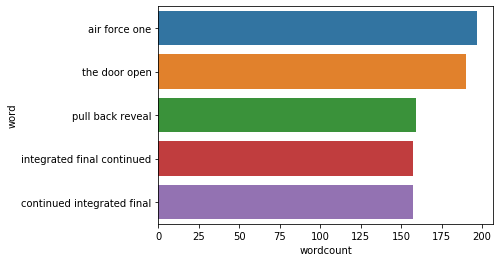

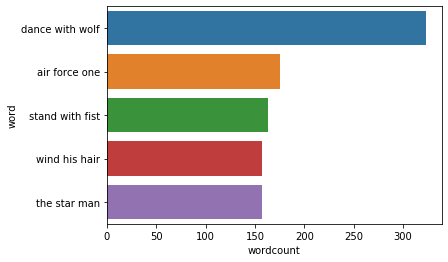

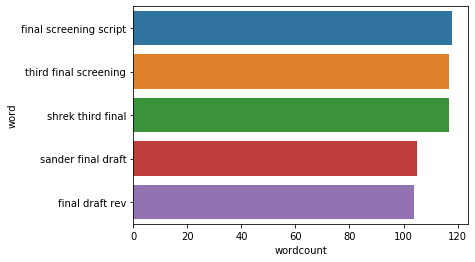

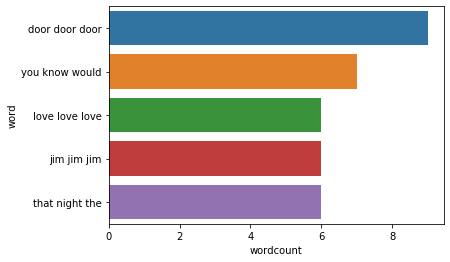

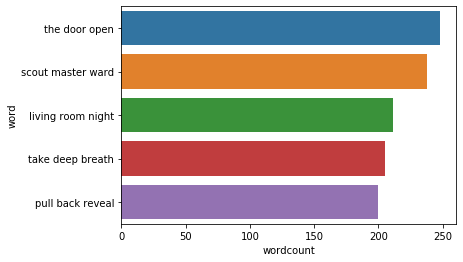

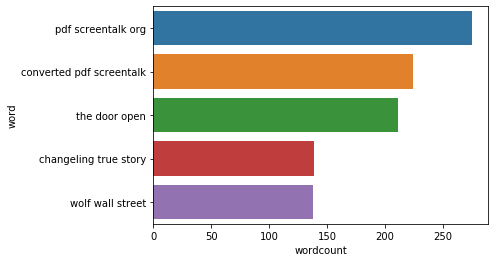

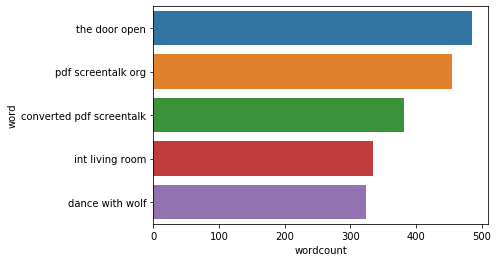

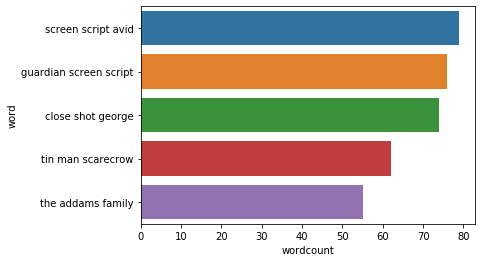

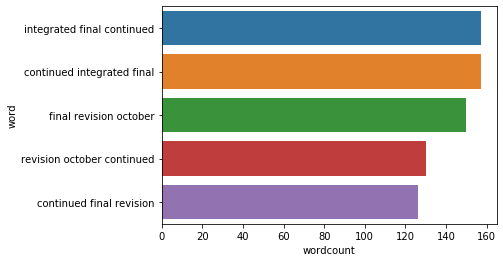

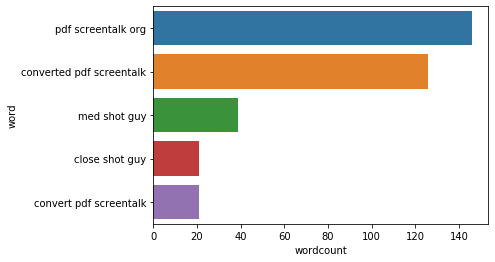

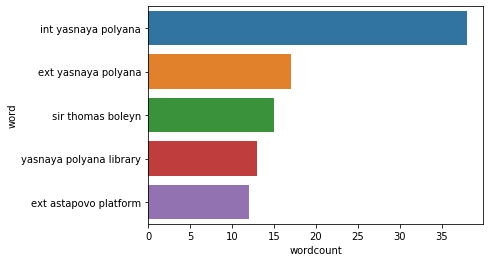

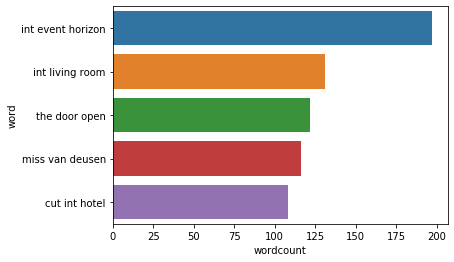

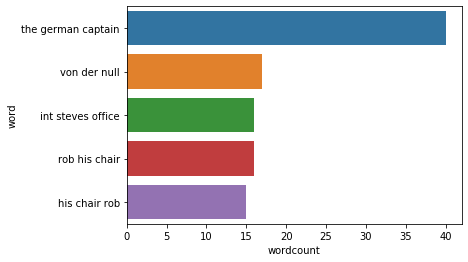

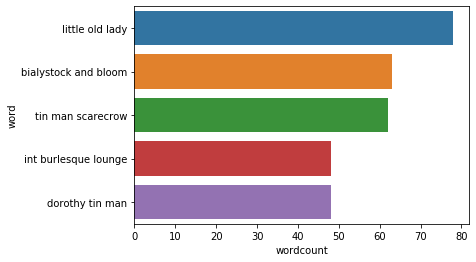

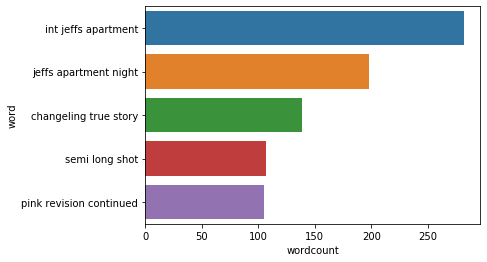

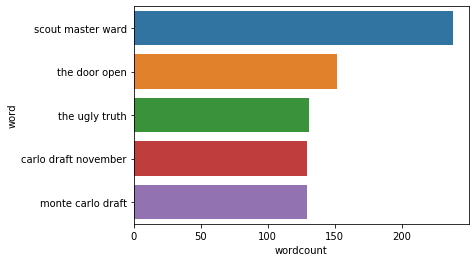

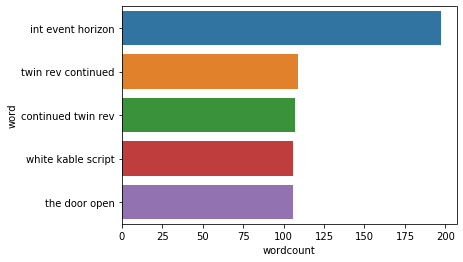

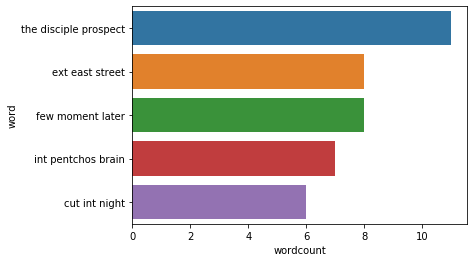

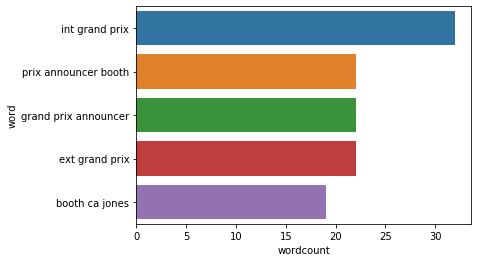

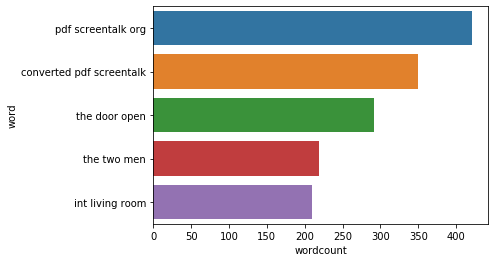

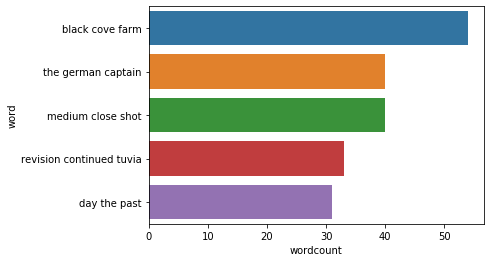

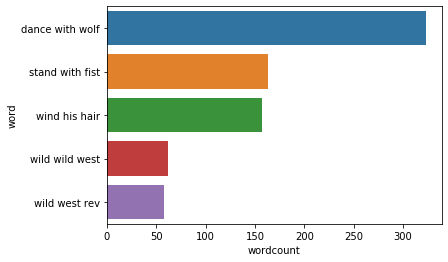

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

<Figure size 432x288 with 0 Axes>

In [27]:
classes = list(range(0,23))

for i in classes:
    
    dic = defaultdict(int)
    plt.figure()
    for j in train_data[train_data['Labels'] == i]['processed_script']:
        
        for words in generate_ngrams(j,3):
            dic[words] += 1
        
    #sorting the words
    fd_sorted = pd.DataFrame(sorted(dic.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]

    sb.barplot(x = fd_sorted['wordcount'][0:5],y = fd_sorted['word'][0:5])
    plt.show()

            

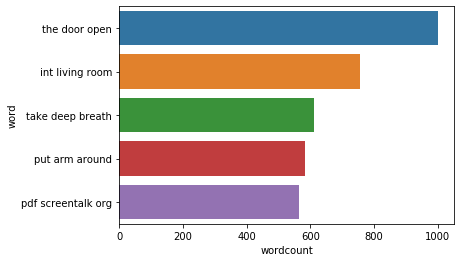

In [26]:
    
dic = defaultdict(int)

for j in test_data['processed_script']:
        
        for words in generate_ngrams(j,3):
            dic[words] += 1
        
    #sorting the words
fd_sorted = pd.DataFrame(sorted(dic.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

sb.barplot(x = fd_sorted['wordcount'][0:5],y = fd_sorted['word'][0:5])
plt.show()

            

In [ ]:

tfidf = TfidfVectorizer( max_features = 17000,ngram_range=(1,7))
bi_words = tfidf.fit(train_data['processed_script'])
bi_metrix  = tfidf.transform(train_data['processed_script'])
bi_X_pad = pad_sequences(bi_metrix.toarray(),maxlen=17000)


In [77]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocal_size,output_dim=16,input_length=17000))
# model.add(LSTM(128, recurrent_dropout=0.1))
model2.add(Flatten())
model2.add(Dropout(0.25))
model2.add(Dense(54))
model2.add(Dropout(0.25))
model2.add(Dense(22, activation='softmax'))

model2.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model2.summary()


NameError: name 'vocal_size' is not defined

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    bi_X_pad,
    Y,
    test_size=0.2,
    shuffle=True,
    random_state=42)

In [48]:
history = model2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=3)

Train on 1582 samples, validate on 396 samples
Epoch 1/3
1582/1582 [==============================] - 11s 7ms/step - loss: 0.3471 - accuracy: 0.9392 - val_loss: 0.1696 - val_accuracy: 0.9545
Epoch 2/3
1582/1582 [==============================] - 10s 7ms/step - loss: 0.1630 - accuracy: 0.9545 - val_loss: 0.1600 - val_accuracy: 0.9545
Epoch 3/3
1582/1582 [==============================] - 10s 6ms/step - loss: 0.1593 - accuracy: 0.9545 - val_loss: 0.1584 - val_accuracy: 0.9545


In [ ]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')

In [ ]:
#convert loss back to numbers




print('logloss on train data is:',log_loss(y_train,model.predict(X_train)))

# log_loss([1,1,1],[1,1,1])


print('logloss on test data is:',log_loss(y_test,model.predict(X_test)))


In [55]:
# free up resources

# del X_pad,X_train,bi_X_pad
gc.collect()

40

# Using Word2Vec (training on the dataset)

In [5]:
vocab = []
for sent in train_data['processed_script']:
    
    vocab.append(sent.split())
    
   

In [4]:
import time 

t1 = time.time()


w2v_model = Word2Vec(
                     sentences = vocab,
                     min_count=20,
                     window=10,
                     size=100,
                     
                     workers=-1)


print(time.time() - t1)

W0509 21:58:00.080286  7980 base_any2vec.py:1343] EPOCH - 1 : supplied example count (0) did not equal expected count (1978)
W0509 21:58:00.089556  7980 base_any2vec.py:1348] EPOCH - 1 : supplied raw word count (0) did not equal expected count (27874147)
W0509 21:58:00.097290  7980 base_any2vec.py:1343] EPOCH - 2 : supplied example count (0) did not equal expected count (1978)
W0509 21:58:00.107290  7980 base_any2vec.py:1348] EPOCH - 2 : supplied raw word count (0) did not equal expected count (27874147)
W0509 21:58:00.115751  7980 base_any2vec.py:1343] EPOCH - 3 : supplied example count (0) did not equal expected count (1978)
W0509 21:58:00.121293  7980 base_any2vec.py:1348] EPOCH - 3 : supplied raw word count (0) did not equal expected count (27874147)
W0509 21:58:00.135293  7980 base_any2vec.py:1343] EPOCH - 4 : supplied example count (0) did not equal expected count (1978)
W0509 21:58:00.142310  7980 base_any2vec.py:1348] EPOCH - 4 : supplied raw word count (0) did not equal expect

14.353570222854614


In [6]:
# wordVec = pk.load(open('wordVec','rb'))

In [7]:
gc.collect()

20

# Creating Embedding Matrix

In [8]:
# text = train_data['processed_script'][0]
gc.collect()

embeded_vocab = []

for samples in train_data['processed_script']:

    emb1 = []

    for word in samples.split():

        emb1.append(wordVec.wv[word])

    embeded_vocab.append(emb1) 
    

In [ ]:
data = pad_sequences(embeded_vocab,maxlen=15000)

In [ ]:
data.shape

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    Y,
    test_size=0.2,
    shuffle=True,
    random_state=42)

In [16]:
model2 = Sequential()
# model2.add(Embedding(input_dim=vocal_size,output_dim=8,input_length=17000))
model2.add(LSTM(128,input_shape = (300,100)))
# model2.add(Dropout(0.25))
model2.add(Dense(64,activation = 'relu'))
# model2.add(Dropout(0.25))
model2.add(Dense(22, activation='softmax'))

model2.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model2.summary()

print(model2.input_shape)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 54)                6966      
_________________________________________________________________
dropout_2 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1210      
Total params: 125,424
Trainable params: 125,424
Non-trainable params: 0
_________________________________________________________________
(None, 300, 100)


In [17]:
history = model2.fit(X_train,y_train,epochs = 10,validation_data = (X_test,y_test))


Train on 1582 samples, validate on 396 samples
Epoch 1/10
1582/1582 [==============================] - 493s 312ms/step - loss: 0.1671 - accuracy: 0.9545 - val_loss: 0.1584 - val_accuracy: 0.9545
Epoch 2/10
1504/1582 [===========================>..] - ETA: 20s - loss: 0.1593 - accuracy: 0.9545

KeyboardInterrupt: 

In [18]:
#convert loss back to numbers




print('logloss on train data is:',log_loss(y_train,model2.predict(X_train)))

# log_loss([1,1,1],[1,1,1])


print('logloss on test data is:',log_loss(y_test,model2.predict(X_test)))


logloss on train data is: 2.4625919763417974
logloss on test data is: 2.5414269337750444


In [19]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

NameError: name 'history' is not defined

In [23]:
test_pred = model2.predict(X_test)


In [ ]:
pred_labels = np.argmax(test_pred,axis = 1)

In [36]:
labels = br.inverse_transform(y_test)
print(labels)
f1_score(labels,pred_labels,average = "micro")

[ 1  0 16  5  6  5 15  6  4 19  4 19 19  8  4  4 19  4  6  6  4 19 19  1
  5 21  6  7  0  0 19  0  4  1  0  5  5 15 16  0  6  6  6 16  6  0  6  8
  4  8  0 11  0 19  0 19  4  5  4 19 15  1  5  8  0  5  0  1 20  4  6  1
  7 17  1  1  5  4  5  2  0  6 11  5  4  4  0  6 11  6  0 11  1  6  2  0
  1  5  0  7  6  2  6 14  6  6 12 19  5  1  5  6  4  2  5  0 15 15  6 19
  6  6 15 15  6 19  0  5 15 15  6  6  4  6 19 19  6 16  0 15  0 14  2  0
  1 16 15 15  8 19  8 19 16 11  0  6 15  5  1  0  6  5  4  4  4 16 14 14
  0  5  8  8 14  6  4 11  4 19 16 13 14  0  4  5  6  1  5  0  6  1 20  4
 14  4  4 16 11 11 19 19  8  6 14  4  6  0  5 14 16 19 16  4  4  4 14  4
  4  4  6 15  6 11  0  6  7 15  6  4  4 19  6  5  0 19  6 19 20 15 16  6
  4 19  4 11  6  0  1  0  1 19  1  6  6 19 19  0 11  4  6 15  4 13  8  0
 15  7  4  4  4  7 19  4  4 19 15  0  5  4 19 14  4  6 11  6 16  6 20 19
 14  1 19  5  8 16  5  6 16 13  4  8  5 11  6  6 19 19 14  6 14  1  0  0
 19  6 15 15  4  4  5  4 16  8  1 19 13  1  2  2 19

0.17424242424242425

# Predicting on Test Set

In [97]:
# embedding_vector_size = 256
# trigrams_model = Word2Vec(
#     sentences = trigrams[bigrams[all_reviews]],
#     size = embedding_vector_size,
#     min_count=3, window=5, workers=4)

# tokenizer = text.Tokenizer(num_words=17000)
# tokenizer.fit_on_texts(test_data['processed_script'])

# metrix = tokenizer.texts_to_matrix(test_data['processed_script'],mode = 'tfidf')




# tfidf = TfidfVectorizer(max_features = 17000,ngram_range=(1,3))
# test_bi_words = tfidf.fit(train_data['processed_script'])
# test_metrix  = tfidf.transform(test_data['processed_script'])


test_metrix = tokenizer.texts_to_sequences(test_data['processed_script'])


data_x = pad_sequences(test_metrix,maxlen=15000)


print(data_x.shape)



(849, 15000)


In [98]:
final_pred = model.predict(data_x)

# File Format

In [99]:
pd.read_excel('Movie_Scripts_Sample_Submission.xlsx').head(5)

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.254897,0.070870,0.034026,0.001088,0.076833,0.055085,0.108631,0.014625,0.040442,...,0.002126,0.007801,0.031488,0.047958,0.081665,0.001089,0.000549,0.103292,0.009705,0.004852
1,file_809.txt,0.072761,0.042652,0.011684,0.001046,0.128757,0.067255,0.234022,0.012940,0.034502,...,0.002092,0.007767,0.088627,0.070536,0.042840,0.001048,0.000524,0.114109,0.008936,0.004475
2,file_1383.txt,0.176885,0.055458,0.011611,0.000980,0.082053,0.046127,0.297048,0.011906,0.036915,...,0.001932,0.007315,0.030388,0.060440,0.041038,0.000975,0.000483,0.079213,0.009655,0.004332
3,file_983.txt,0.077208,0.040396,0.010318,0.000940,0.110868,0.069286,0.193717,0.011270,0.031018,...,0.001883,0.006810,0.031463,0.055402,0.040821,0.000947,0.000475,0.260130,0.008493,0.004113
4,file_1713.txt,0.108292,0.044440,0.010759,0.000963,0.081152,0.073162,0.174912,0.011675,0.032233,...,0.001917,0.007004,0.032439,0.050234,0.046141,0.000974,0.000484,0.264620,0.009009,0.004406


In [100]:
test_set_preds = pd.DataFrame(columns = train_data.Labels.unique().tolist())
test_set_preds.insert(0, 'File_Name', test_data.File_Name)

test_set_preds.head()

,File_Name,8,4,6,16,15,19,1,14,0,...,7,3,13,20,21,12,10,17,9,18
0,file_2300.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,file_809.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,file_1383.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,file_983.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,file_1713.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
test_set_preds.iloc[:,1:] = final_pred
test_set_preds.head()

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.0256326,0.0351455,0.0128284,0.00111921,0.245978,0.0315779,0.228244,0.0271621,0.0441081,...,0.00436587,0.0124784,0.031976,0.125367,0.0259457,0.00123571,0.001004,0.0901438,0.00276151,0.000956109
1,file_809.txt,0.0179654,0.0184243,0.00157897,0.000155569,0.140897,0.033397,0.110842,0.0019571,0.0175796,...,0.000614522,0.00146241,0.0169031,0.46951,0.0251135,0.000108571,0.000175346,0.100078,0.00168049,0.000288592
2,file_1383.txt,0.0546892,0.195377,0.00748909,0.000927799,0.0442984,0.0349448,0.0470101,0.00656141,0.0170078,...,0.00159826,0.00579182,0.0254376,0.0208314,0.384757,0.000409464,0.000662415,0.0754451,0.00522722,0.00096421
3,file_983.txt,0.0212245,0.0451808,0.0556375,0.027031,0.0924233,0.0229504,0.0574286,0.10498,0.0827776,...,0.0265736,0.0702067,0.0318801,0.0612732,0.0275205,0.0605795,0.0188589,0.0521217,0.0204347,0.0172008
4,file_1713.txt,0.207082,0.166546,0.000858833,0.000341205,0.0188597,0.0264648,0.112859,0.0014312,0.0136385,...,0.00165396,0.00158945,0.227295,0.0199447,0.070507,0.000167314,0.00112256,0.0738421,0.00392525,0.00228299


In [103]:
#Reorder the columns to match the Sample_submission_file
test_set_preds = test_set_preds[['File_Name',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

test_set_preds.head(10)

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.0256326,0.0351455,0.0128284,0.00111921,0.245978,0.0315779,0.228244,0.0271621,0.0441081,...,0.00436587,0.0124784,0.031976,0.125367,0.0259457,0.00123571,0.001004,0.0901438,0.00276151,0.000956109
1,file_809.txt,0.0179654,0.0184243,0.00157897,0.000155569,0.140897,0.033397,0.110842,0.0019571,0.0175796,...,0.000614522,0.00146241,0.0169031,0.46951,0.0251135,0.000108571,0.000175346,0.100078,0.00168049,0.000288592
2,file_1383.txt,0.0546892,0.195377,0.00748909,0.000927799,0.0442984,0.0349448,0.0470101,0.00656141,0.0170078,...,0.00159826,0.00579182,0.0254376,0.0208314,0.384757,0.000409464,0.000662415,0.0754451,0.00522722,0.00096421
3,file_983.txt,0.0212245,0.0451808,0.0556375,0.027031,0.0924233,0.0229504,0.0574286,0.10498,0.0827776,...,0.0265736,0.0702067,0.0318801,0.0612732,0.0275205,0.0605795,0.0188589,0.0521217,0.0204347,0.0172008
4,file_1713.txt,0.207082,0.166546,0.000858833,0.000341205,0.0188597,0.0264648,0.112859,0.0014312,0.0136385,...,0.00165396,0.00158945,0.227295,0.0199447,0.070507,0.000167314,0.00112256,0.0738421,0.00392525,0.00228299
5,file_629.txt,0.0108989,0.00918293,0.000435779,0.000119614,0.0809291,0.0192793,0.109887,0.00157455,0.00861441,...,0.000962094,0.00113629,0.0192827,0.632876,0.0165096,0.000100317,0.00035005,0.0625389,0.00184934,0.000550752
6,file_1213.txt,0.0893936,0.0752172,0.003169,0.00109805,0.0507787,0.0618606,0.149896,0.00960429,0.039265,...,0.0035132,0.00682151,0.0529125,0.0554031,0.0942182,0.00076658,0.00246824,0.183792,0.00733973,0.00419696
7,file_2311.txt,0.0361939,0.0199492,0.000744812,0.000265054,0.0344037,0.0358946,0.0729952,0.00180187,0.0116625,...,0.00145163,0.00129397,0.365399,0.0373422,0.0442685,0.000115653,0.000679134,0.293083,0.00233066,0.00126595
8,file_1004.txt,0.0142944,0.0256254,0.00507687,0.000464584,0.246885,0.0244903,0.213271,0.210343,0.0200294,...,0.00122182,0.00636355,0.0188495,0.0631648,0.0302533,0.00035434,0.000407176,0.0671807,0.00204187,0.000449753
9,file_1382.txt,0.0391352,0.0432024,0.0044797,0.000365928,0.244521,0.0314742,0.100078,0.00633786,0.020938,...,0.000846722,0.00461402,0.0231112,0.0424298,0.0550481,0.000202384,0.000312875,0.311281,0.00235948,0.000407853


In [104]:
test_set_preds.to_excel('lem-seq-dense-2.xlsx', index=False)